In [ ]:
import pandas as pd
import re
from sklearn.utils import resample

# Load dataset
df = pd.read_csv("/content/tweet_emotions.csv")

# -----------------------------
# 1. CLEAN TEXT
# -----------------------------
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)       # remove URLs
    text = re.sub(r"@\w+", "", text)                # remove mentions
    text = re.sub(r"#\w+", "", text)                # remove hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)         # remove emojis/symbols
    text = re.sub(r"\s+", " ", text).strip()        # remove extra spaces
    return text

df["clean_text"] = df["content"].apply(clean_text)

# -----------------------------
# 2. MERGE INTO 6 CLASSES
# -----------------------------
label_map = {
    "happiness": "joy",
    "fun": "joy",
    "enthusiasm": "joy",
    "sadness": "sadness",
    "boredom": "sadness",
    "empty": "sadness",
    "anger": "anger",
    "hate": "anger",
    "love": "love",
    "worry": "fear",
    "neutral": "neutral",
    "surprise": "neutral",
    "relief": "neutral"
}

df = df[df["sentiment"].isin(label_map.keys())]   # remove out-of-map labels
df["final_label"] = df["sentiment"].map(label_map)

print("Class distribution BEFORE balancing:")
print(df["final_label"].value_counts())

# -----------------------------
# 3. BALANCE DATASET
# -----------------------------
max_count = df["final_label"].value_counts().max()
balanced_df = pd.DataFrame()

for label in df["final_label"].unique():
    subset = df[df["final_label"] == label]
    oversampled = resample(subset, replace=True, n_samples=max_count, random_state=42)
    balanced_df = pd.concat([balanced_df, oversampled])

balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)  # shuffle

print("\nClass distribution AFTER balancing:")
print(balanced_df["final_label"].value_counts())

# -----------------------------
# 4. SAVE BALANCED DATASET
# -----------------------------
balanced_df.to_csv("balanced_emotions.csv", index=False)
print("\nBalanced dataset saved as balanced_emotions.csv")



Class distribution BEFORE balancing:
final_label
neutral    12351
fear        8459
joy         7744
sadness     6171
love        3842
anger       1433
Name: count, dtype: int64

Class distribution AFTER balancing:
final_label
anger      12351
sadness    12351
joy        12351
neutral    12351
love       12351
fear       12351
Name: count, dtype: int64

Balanced dataset saved as balanced_emotions.csv


In [ ]:
df = pd.read_csv("/content/balanced_emotions.csv")

First 5 rows of the balanced dataset:


,tweet_id,sentiment,content,clean_text,final_label
0,1694438930,hate,@emzyjonas Yea once - me and my friends flew o...,yea once me and my friends flew out to amercia...,anger
1,1957564908,sadness,My phone passed away yesterday.. He jumped off...,my phone passed away yesterday he jumped off t...,sadness
2,1693974800,happiness,"Woop, have just bought the Elliot Minor album ...",woop have just bought the elliot minor album o...,joy
3,1962109294,hate,@orbitaldiamonds That drives me nuts.,that drives me nuts,anger
4,1958135239,neutral,Barnsley To Keep Davey And Sign A New Experi...,barnsley to keep davey and sign a new experien...,neutral



Missing values in the balanced dataset:


,0
tweet_id,0
sentiment,0
content,0
clean_text,123
final_label,0


/tmp/ipython-input-3306707515.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='final_label', palette='viridis')


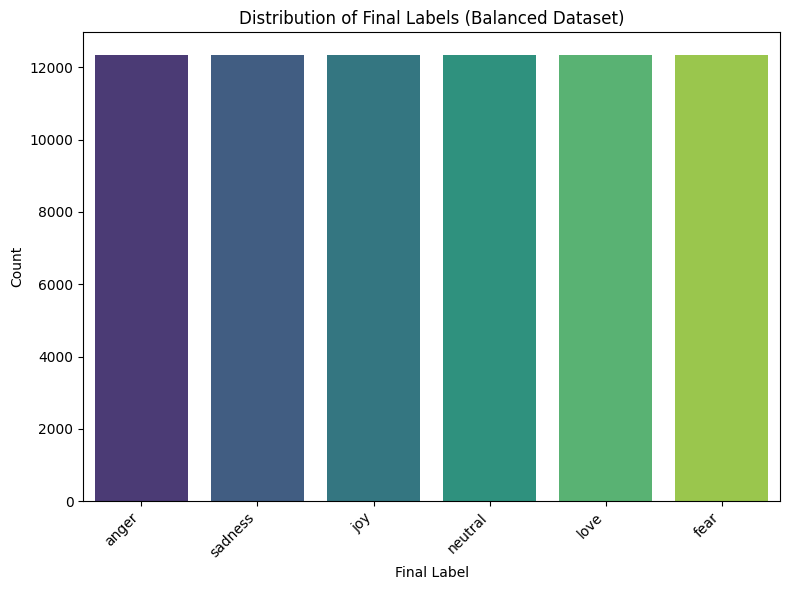

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows
print("First 5 rows of the balanced dataset:")
display(df.head())

# Check for missing values
print("\nMissing values in the balanced dataset:")
display(df.isnull().sum())

# Visualize the distribution of the final labels
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='final_label', palette='viridis')
plt.title('Distribution of Final Labels (Balanced Dataset)')
plt.xlabel('Final Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,tweet_id,sentiment,content,clean_text,final_label,label_encoded
0,1694438930,hate,@emzyjonas Yea once - me and my friends flew o...,yea once me and my friends flew out to amercia...,anger,0
1,1957564908,sadness,My phone passed away yesterday.. He jumped off...,my phone passed away yesterday he jumped off t...,sadness,5
2,1693974800,happiness,"Woop, have just bought the Elliot Minor album ...",woop have just bought the elliot minor album o...,joy,2
3,1962109294,hate,@orbitaldiamonds That drives me nuts.,that drives me nuts,anger,0
4,1958135239,neutral,Barnsley To Keep Davey And Sign A New Experi...,barnsley to keep davey and sign a new experien...,neutral,4
